<a href="https://colab.research.google.com/github/TanoOliva/ADA-Informes/blob/main/RadixSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema:


En computación y matemáticas un algoritmo de ordenamiento es un algoritmo que pone elementos de una lista o un vector en una secuencia dada por una relación de orden, es decir, el resultado de salida ha de ser una permutación —o reordenamiento— de la entrada que satisfaga la relación de orden dada. Las relaciones de orden más usadas son el orden numérico y el orden lexicográfico. Ordenamientos eficientes son importantes para optimizar el uso de otros algoritmos (como los de búsqueda y fusión) que requieren listas ordenadas para una ejecución rápida. También es útil para poner datos en forma canónica y para generar resultados legibles por humanos. 

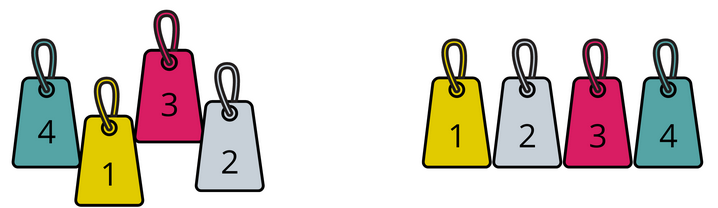


Entrada: un arreglo de n números desordenado siendo n el largo del arreglo

Salida: el mismo arreglo de tamaño n pero ordenado de menor a mayor


# Descripción del algoritmo


Radixsort es un algoritmo que clasifica los elementos agrupando primero los dígitos individuales del mismo valor posicional y luego ordena los elementos según su orden creciente/decreciente. Esto lo hace de siguiente forma:

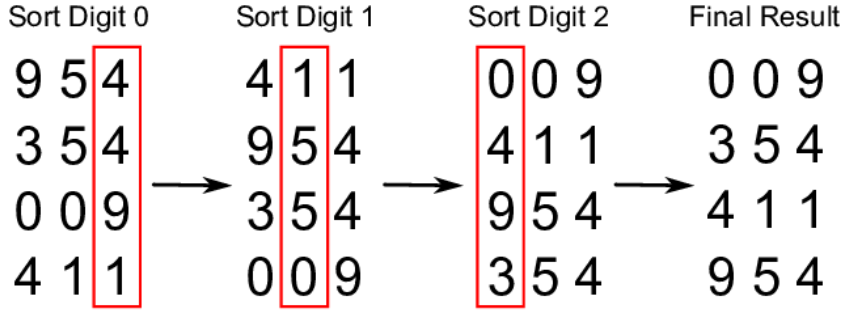





1.   Entrada: Recibe como entrada un array de n números.

2.   Inicialización de  contadores: Inicializa un arreglo "count" en cero los contadores que el algoritmo va a utilizar, para almacenar los digitos de 0 a 9

3.   Conteo: El conteo calcula un histograma de los valores del dígito para las claves almacenadas en un vector del paso anterior

4.   Suma Parcial: En este paso se calcula la suma parcial de los contadores, de la forma count[i] += count[i-1]

5.   Movimiento: En el paso de movimiento se leen cada una de las claves y punteros del arreglo inicial para escribirtlas en el arreglo "output" la posicion del arreglo "output" en la que se escribe una vlave y su puntero se obtiene del contador del arreglo "count" indexado por el valor del digito de la clave. Despues de copiar la clave y el puntero del arreglo inicial al arreglo "output" se incrementa el contador corresponiednte en el arreglo incial

6.   Repetir: En la funcion RadixSort se calcula la cantidad de digitos que tiene el numero mas grande para asi seguir ordenando por unidad,decena,centena,etc.

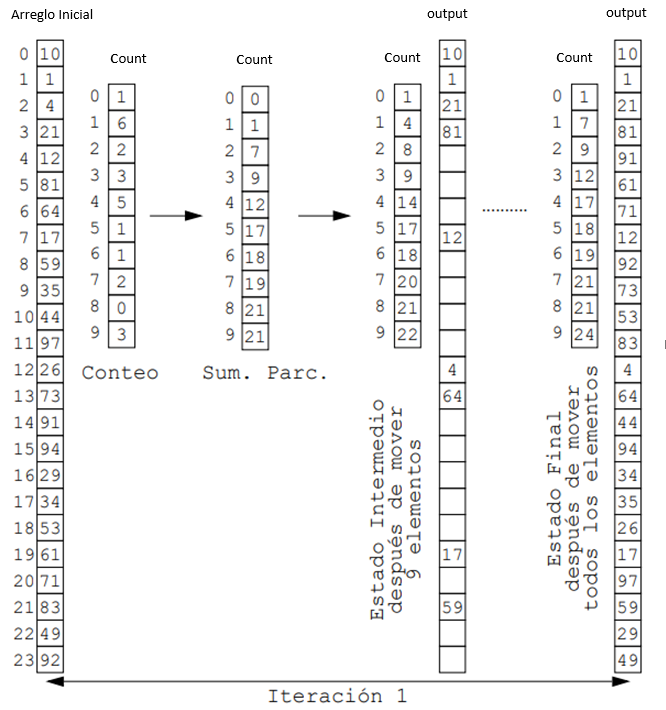



In [67]:
def countingSort(array, place,verbose=False):
    global pasada
    size = len(array)
    output = [0] * size
    count = [0] * 10
    pasada+=1

    if verbose== True:
      print("Ordenando digitos del orden ( 10 ^",pasada-1,")")
    
    # Calculate count of elements
    for i in range(0, size):
        index = array[i] // place
        count[int(index % 10)] += 1
    if verbose==True: print("Conteo:                ",count)
    # Calculate cumulative count
    for i in range(1, 10):
        count[i] += count[i - 1]
    
    if verbose == True: 
      print("Suma parcial:          ", count)
    
    # Place the elements in sorted order
    i = size - 1
    while i >= 0:
        index = array[i] // place
        parche = int(count[int(index % 10)] - 1)
        output[parche] = array[i]
        count[int(index % 10)] -= 1
        i -= 1
    if verbose==True: print("Movimiento:            ",count)
    for i in range(0, size):
        array[i] = output[i]
    if verbose==True: print("Output:                ",array,"\n")    

In [68]:
def radix_Sort(array,verbose=False):
    # Obtiene el elemento maximo del arreglo
    max_element = max(array)

    # Se aplica couting sort para ordenar los elementos segun su posicion
    place = 1
    while max_element // place > 0:
        if verbose==True: countingSort(array, place,verbose=True)
        else: countingSort(array, place)
        place *= 10
    return array


In [69]:
arr = [5,20,5,13,6,8,34,1]
pasada=0
print("Arreglo que entra:",arr,"\n")
ans = radix_Sort(arr)
print("Arreglo ordenado ",ans)

Arreglo que entra: [5, 20, 5, 13, 6, 8, 34, 1] 

Arreglo ordenado  [1, 5, 5, 6, 8, 13, 20, 34]


# Ejemplo mediante la funcion verbose

In [70]:
arr = [2000,345,13,6,8877,34,1]
pasada=0
print("Arreglo que entra:",arr,"\n")
ans = radix_Sort(arr,verbose=True)
print("Arreglo ordenado ",ans)

Arreglo que entra: [2000, 345, 13, 6, 8877, 34, 1] 

Ordenando digitos del orden ( 10 ^ 0 )
Conteo:                 [1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
Suma parcial:           [1, 2, 2, 3, 4, 5, 6, 7, 7, 7]
Movimiento:             [0, 1, 2, 2, 3, 4, 5, 6, 7, 7]
Output:                 [2000, 1, 13, 34, 345, 6, 8877] 

Ordenando digitos del orden ( 10 ^ 1 )
Conteo:                 [3, 1, 0, 1, 1, 0, 0, 1, 0, 0]
Suma parcial:           [3, 4, 4, 5, 6, 6, 6, 7, 7, 7]
Movimiento:             [0, 3, 4, 4, 5, 6, 6, 6, 7, 7]
Output:                 [2000, 1, 6, 13, 34, 345, 8877] 

Ordenando digitos del orden ( 10 ^ 2 )
Conteo:                 [5, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Suma parcial:           [5, 5, 5, 6, 6, 6, 6, 6, 7, 7]
Movimiento:             [0, 5, 5, 5, 6, 6, 6, 6, 6, 7]
Output:                 [2000, 1, 6, 13, 34, 345, 8877] 

Ordenando digitos del orden ( 10 ^ 3 )
Conteo:                 [5, 0, 1, 0, 0, 0, 0, 0, 1, 0]
Suma parcial:           [5, 5, 6, 6, 6, 6, 6, 6, 7, 7]
Movimiento: 

# Correctitud

La corrección de RadixSort se obtiene por inducción en la columna que es ordenada (imagen al final de la correctitud). El análisis del tiempo de ejecución depende de la ordenación estable utilizada como algoritmo de ordenación intermedio. Cuando cada dígito está en el rango de 0 a k-1 (de modo que puede tomar k valores posibles), y k no es demasiado grande, la ordenación por conteo es la opción obvia. Cada pasada sobre n números de d dígitos lleva entonces el tiempo O(n+k). Hay d pasadas, por lo que el tiempo total de la ordenación radix O(d(n+k)). 

Cuando d es constante y k = O(n), podemos hacer que la ordenación radix se ejecute en tiempo lineal. En general, tenemos cierta flexibilidad en la forma de dividir cada clave en dígitos.

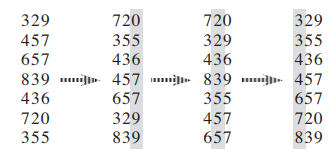





# Tiempo de ejecución
El ordenamiento radix opera en un tiempo de O(n), donde n es el numero de claves.
Los Casos Peor y Mejor son también de tiempo lineal ( O(n) ) ya que CountingSort no compara entonces da lo mismo la ordenación que ya tenga el arreglo, hace todas las operaciones de igual manera, solo que ahora repetidas d veces por el FOR de afuera de RadixSort.

Dados n números en los cuales cada digito puede tomar k posibles valores, Radix sort ordena correctamente los n números en O(d(n+k)), si d es constante y k =O(n).

# Experimentos

In [71]:
import matplotlib.pyplot as plt
import time
from termcolor import colored
import numpy as np
import random
import math


def randomArray(n):
  array = np.zeros(n)
  for i in range (len(array)):
    array[i] = int(random.randint(1,300))
  return array

def bucket_sort(alist):
    largest = max(alist)
    length = len(alist)
    size = largest/length
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
 
    for i in range(length):
        insertion_sort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]
 
    return result
 
def insertion_sort(alist):
    for i in range(1, len(alist)):
        temp = alist[i]
        j = i - 1
        while (j >= 0 and temp < alist[j]):
            alist[j + 1] = alist[j]
            j = j - 1
        alist[j + 1] = temp

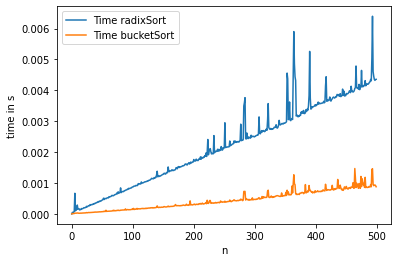

In [76]:
z = np.zeros(500)
y = np.zeros(500)
x = [n for n in range(0,500)]
for i in range (1,500):
  array = randomArray(i)
  array1 = array
  start = time.time()
  array = radix_Sort(array)
  end = time.time()
  y[i] = end - start

  start = time.time()
  array1 = bucket_sort(array1)
  end = time.time()
  z[i] = end - start


plt.plot(x,y,z)
plt.legend(["Time radixSort","Time bucketSort"])


plt.xlabel('n')
plt.ylabel('time in s')
plt.show()

# Análisis

En el grafico se puede ver que el tiempo de ejecucion de bucketSort es mucho menor a radixSort ya que la complejidad de bucketSort es O(n) y la de radixSort O(d(n+k))

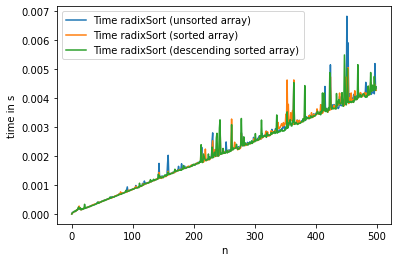

In [81]:
z = np.zeros(500)
y = np.zeros(500)
w = np.zeros(500)
x = [n for n in range(0,500)]
for i in range (1,500):
  array = randomArray(i)
  start = time.time()
  array = radix_Sort(array)
  end = time.time()
  y[i] = end - start

  start = time.time()
  array = radix_Sort(array)
  end = time.time()
  z[i] = end - start

  array = array[::-1]
  start = time.time()
  array = radix_Sort(array)
  end = time.time()
  w[i] = end - start




plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,w)
plt.legend(["Time radixSort (unsorted array)","Time radixSort (sorted array)","Time radixSort (descending sorted array)"])


plt.xlabel('n')
plt.ylabel('time in s')
plt.show()

Como se está utilizando countinSort para la implementación RadixSort tendrá su misma complejidad temporal de O(d(n+k)) tanto en su mejor caso, caso promedio y peor caso.